# Task 3 Find best results

For this problem you have the following situation: you are playing a game of tic-tac-toe, and you find the situation in the figure below, next is your turn, develop a quantum algorithm to be able to find the best decisions with higher probability.

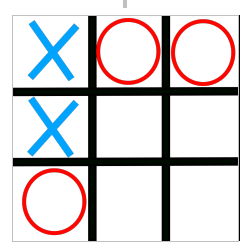

The following considerations apply:

    • You are the X's.
    
    • The matrix as a qubit and the state of the X's is |1> and of the O's is |0>, of the empty cells an unknown state.
    
    • What are the valid combinations to win?
    
    • You have at most 2 turns

In [1]:
pip install qiskit


You should consider upgrading via the '/home/basak/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


import necessary modules


In [1]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, assemble, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# tic-tac-toe layout

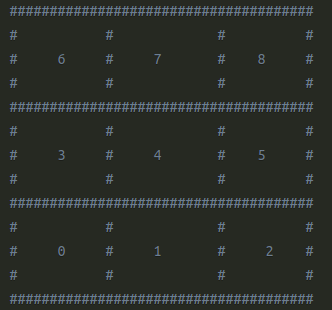

In [5]:
l_player_2 = [3,6] #list of qbits cell numbers inicialized to 0(player1 tiles)
l_player_1 = [0,7,8] #list of qbits cell numbers inicialized to 1(player 2 tiles)
l_entangled = [(1,2),(4,5)] #list of pairs of cells that need to be entangled to |01>+|10>


# translate from lists to initial state matrix

In [6]:
l_initial_ordered = [0,0,0,0,0,0,0,0,0]
for inx in range(len(l_player_1)):
    l_initial_ordered[l_player_1[inx]]=0
for inx in range(len(l_player_2)):
    l_initial_ordered[l_player_2[inx]]=1  
entg_num = 1
for inx in range(len(l_entangled)):
    l_initial_ordered[l_entangled[inx][0]]='e'+str(entg_num )   
    l_initial_ordered[l_entangled[inx][1]]='e'+str(entg_num  )
    entg_num +=1

print('This the initial table state inputed by the user:\n0 corresponds to player 1, 1 corresponds to player 2,\n e1,e2,e3... corresponds to entangled tiles')
print('-----\n'+str(l_initial_ordered[6])+'|'+str(l_initial_ordered[7])+'|'+str(l_initial_ordered[8]))
print('-----\n'+str(l_initial_ordered[3])+'|'+str(l_initial_ordered[4])+'|'+str(l_initial_ordered[5]))
print('-----\n'+str(l_initial_ordered[0])+'|'+str(l_initial_ordered[1])+'|'+str(l_initial_ordered[2]))
print('-----')

This the initial table state inputed by the user:
0 corresponds to player 1, 1 corresponds to player 2,
 e1,e2,e3... corresponds to entangled tiles
-----
1|0|0
-----
1|e2|e2
-----
0|e1|e1
-----


# define a 9-qubit Quantum to represent the tiles.

This is the corresponding quantum circuit from the users input


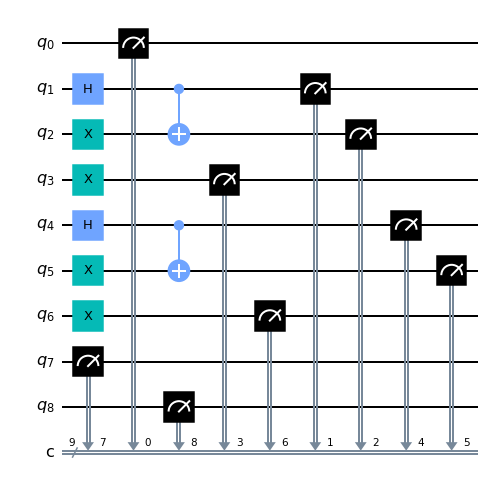

In [7]:
#Quantum circuit to represent the tiles
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(9, 9)
circuit.name = "Tic toc toe"

for inx  in range(len(l_player_2)):
    circuit.x(l_player_2[inx])

for inx in range(len(l_entangled)):
    circuit.h(l_entangled[inx][0]) #hardamard gate
    circuit.x(l_entangled[inx][1]) #x gate
    circuit.cx(l_entangled[inx][0],l_entangled[inx][1]) #controlled-x gate
    
circuit.measure(list(range(9)), list(range(9)))

# Print out the circuit
print('This is the corresponding quantum circuit from the users input')
#draw circuit
circuit.draw(output='mpl', filename='circuit.png')

# Once the entangled tiles collapse, one tile is randomly selected to decide a game winner.

In [8]:
def check_winner(board,mark):
    return(((board[0]==mark) and (board[1]== mark) and (board[2]==mark) )or #for row1 

            ((board[3]==mark) and (board[4]==mark) and (board[5]==mark) )or #for row2

            ((board[6]==mark) and (board[7]==mark) and (board[8]==mark) )or #for row3

            ((board[0]==mark) and (board[3]==mark) and (board[6]== mark) )or#for Colm1 

            ((board[1]==mark) and (board[4]==mark) and (board[7]==mark) )or #for Colm 2

            ((board[2]==mark) and (board[5]==mark) and (board[8]==mark) )or #for colm 3

            ((board[0]==mark) and (board[4]==mark) and (board[8]==mark) )or #diagonal 1

            ((board[2]==mark) and (board[4]==mark) and (board[6]==mark) )) #diagonal 2


flag_p1=1 
flag_p2=0

while (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
    print('Running the quantum circuit...')
    flag_p1=0 
    flag_p2=0
    job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=1)
    result = job.result()
    l_final_ordered=list(map(lambda x: int(x),list(list(result.get_counts().keys())[0][::-1])))
    print(l_final_ordered)
    #list with ordered cells
    print('The colapsed state is:')
    print('-----\n'+str(l_final_ordered[6])+'|'+str(l_final_ordered[7])+'|'+str(l_final_ordered[8]))
    print('-----\n'+str(l_final_ordered[3])+'|'+str(l_final_ordered[4])+'|'+str(l_final_ordered[5]))
    print('-----\n'+str(l_final_ordered[0])+'|'+str(l_final_ordered[1])+'|'+str(l_final_ordered[2]))
    print('-----')

    if (check_winner(l_final_ordered,0) ):## to check if player 1 won
        print('Player 1 won!')
        flag_p1 = 1
    else:
        flag_p1 = 0

    if (check_winner(l_final_ordered,1)): ## to check if player 2 won
        print('Player 2 won!')
        flag_p2 = 1
    else:
        flag_p2 = 0

    if (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
        break

    if flag_p1 and flag_p2:
        print('The game will repeat until one one player wins')

    if not(flag_p1 and flag_p2):
        print('No winners,\nThe game will repeat until one one player wins')

Running the quantum circuit...
[0, 0, 1, 1, 1, 0, 1, 0, 0]
The colapsed state is:
-----
1|0|0
-----
1|1|0
-----
0|0|1
-----
Player 2 won!


# second condition

In [18]:
l_player_2 = [3,6] #list of qbits cell numbers inicialized to 0(player1 tiles)
l_player_1 = [0,7,8] #list of qbits cell numbers inicialized to 1(player 2 tiles)
l_entangled = [(1,5),(2,4)] #list of pairs of cells that need to be entangled to |01>+|10>

In [21]:
l_initial_ordered = [0,0,0,0,0,0,0,0,0]
for inx in range(len(l_player_1)):
    l_initial_ordered[l_player_1[inx]]=0
for inx in range(len(l_player_2)):
    l_initial_ordered[l_player_2[inx]]=1  
entg_num = 1
for inx in range(len(l_entangled)):
    l_initial_ordered[l_entangled[inx][0]]='e'+str(entg_num )   
    l_initial_ordered[l_entangled[inx][1]]='e'+str(entg_num  )
    entg_num +=1

print('This the initial table state inputed by the user:\n0 corresponds to player 1, 1 corresponds to player 2,\n e1,e2,e3... corresponds to entangled tiles')
print('-----\n'+str(l_initial_ordered[6])+'|'+str(l_initial_ordered[7])+'|'+str(l_initial_ordered[8]))
print('-----\n'+str(l_initial_ordered[3])+'|'+str(l_initial_ordered[4])+'|'+str(l_initial_ordered[5]))
print('-----\n'+str(l_initial_ordered[0])+'|'+str(l_initial_ordered[1])+'|'+str(l_initial_ordered[2]))
print('-----')

This the initial table state inputed by the user:
0 corresponds to player 1, 1 corresponds to player 2,
 e1,e2,e3... corresponds to entangled tiles
-----
1|0|0
-----
1|e2|e1
-----
0|e1|e2
-----


This is the corresponding quantum circuit from the users input


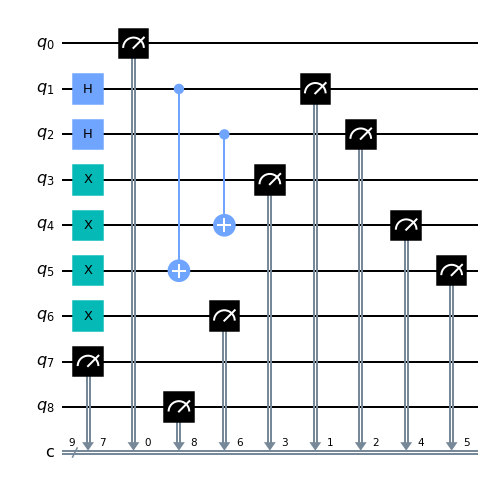

In [23]:
#Quantum circuit to represent the tiles
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(9, 9)
circuit.name = "Tic toc toe"

for inx  in range(len(l_player_2)):
    circuit.x(l_player_2[inx])

for inx in range(len(l_entangled)):
    circuit.h(l_entangled[inx][0]) #hardamard gate
    circuit.x(l_entangled[inx][1]) #x gate
    circuit.cx(l_entangled[inx][0],l_entangled[inx][1]) #controlled-x gate
    
circuit.measure(list(range(9)), list(range(9)))

# Print out the circuit
print('This is the corresponding quantum circuit from the users input')
#draw circuit
circuit.draw(output='mpl', filename='circuit.png')

In [24]:
def check_winner(board,mark):
    return(((board[0]==mark) and (board[1]== mark) and (board[2]==mark) )or #for row1 

            ((board[3]==mark) and (board[4]==mark) and (board[5]==mark) )or #for row2

            ((board[6]==mark) and (board[7]==mark) and (board[8]==mark) )or #for row3

            ((board[0]==mark) and (board[3]==mark) and (board[6]== mark) )or#for Colm1 

            ((board[1]==mark) and (board[4]==mark) and (board[7]==mark) )or #for Colm 2

            ((board[2]==mark) and (board[5]==mark) and (board[8]==mark) )or #for colm 3

            ((board[0]==mark) and (board[4]==mark) and (board[8]==mark) )or #diagonal 1

            ((board[2]==mark) and (board[4]==mark) and (board[6]==mark) )) #diagonal 2


flag_p1=1 
flag_p2=0

while (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
    print('Running the quantum circuit...')
    flag_p1=0 
    flag_p2=0
    job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=1)
    result = job.result()
    l_final_ordered=list(map(lambda x: int(x),list(list(result.get_counts().keys())[0][::-1])))
    print(l_final_ordered)
    #list with ordered cells
    print('The colapsed state is:')
    print('-----\n'+str(l_final_ordered[6])+'|'+str(l_final_ordered[7])+'|'+str(l_final_ordered[8]))
    print('-----\n'+str(l_final_ordered[3])+'|'+str(l_final_ordered[4])+'|'+str(l_final_ordered[5]))
    print('-----\n'+str(l_final_ordered[0])+'|'+str(l_final_ordered[1])+'|'+str(l_final_ordered[2]))
    print('-----')

    if (check_winner(l_final_ordered,0) ):## to check if player 1 won
        print('Player 1 won!')
        flag_p1 = 1
    else:
        flag_p1 = 0

    if (check_winner(l_final_ordered,1)): ## to check if player 2 won
        print('Player 2 won!')
        flag_p2 = 1
    else:
        flag_p2 = 0

    if (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
        break

    if flag_p1 and flag_p2:
        print('The game will repeat until one one player wins')

    if not(flag_p1 and flag_p2):
        print('No winners,\nThe game will repeat until one one player wins')

Running the quantum circuit...
[0, 0, 0, 1, 1, 1, 1, 0, 0]
The colapsed state is:
-----
1|0|0
-----
1|1|1
-----
0|0|0
-----
Player 1 won!
Player 2 won!
The game will repeat until one one player wins


#We can find the valid combinations to win by changing the list of pairs of cells that must be entangled (at the above) (l entangled = [(1,2),(4,5)]).

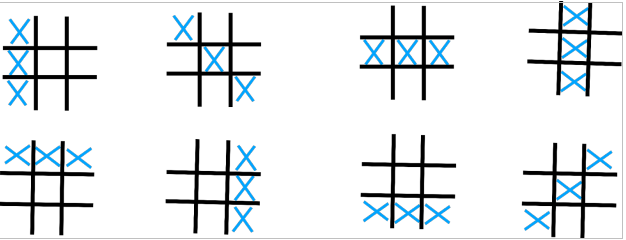